In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:

# Load dataset
df = pd.read_csv("train.csv")

### a. Basic Exploration

In [5]:
print("\n--- Dataset Info ---")
print(df.info())

print("\n--- Dataset Description ---")
print(df.describe(include="all"))

# Value counts for categorical columns
for col in ["Sex", "Embarked", "Pclass"]:
    print(f"\n--- Value Counts: {col} ---")
    print(df[col].value_counts())



--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

--- Dataset Description ---
        PassengerId    Survived      Pclass                 Name   Sex  \
count    891.000000  891.000000  891.000000                  891   891   
unique          NaN         NaN         

In [6]:
# Missing Value Treatment
# ================================
# Fill Age with median per Pclass
df["Age"] = df.groupby("Pclass")["Age"].transform(lambda x: x.fillna(x.median()))

# Fill Embarked with mode
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

# Fill Cabin with 'Unknown'
df["Cabin"] = df["Cabin"].fillna("Unknown")

print("\n--- Missing Values After Treatment ---")
print(df.isnull().sum())



--- Missing Values After Treatment ---
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


### c & d. Histograms, Boxplots, Scatterplots

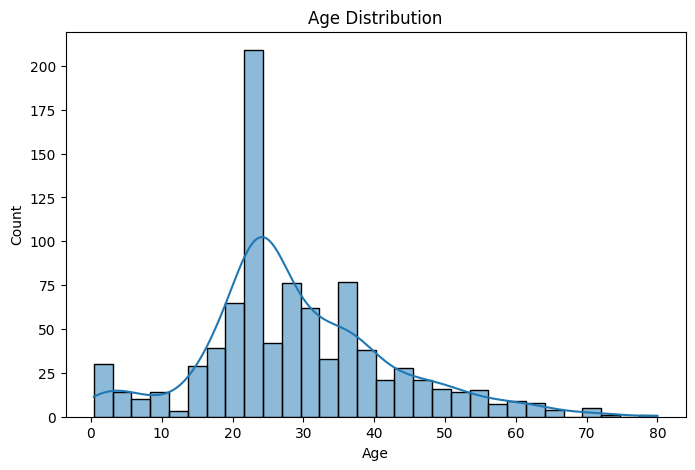

In [7]:

# Histogram: Age
plt.figure(figsize=(8,5))
sns.histplot(df["Age"], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

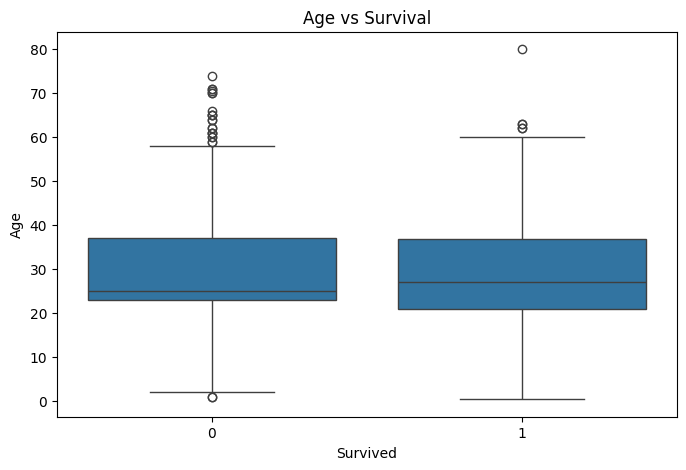

In [8]:
# Boxplot: Age by Survived
plt.figure(figsize=(8,5))
sns.boxplot(x="Survived", y="Age", data=df)
plt.title("Age vs Survival")
plt.show()


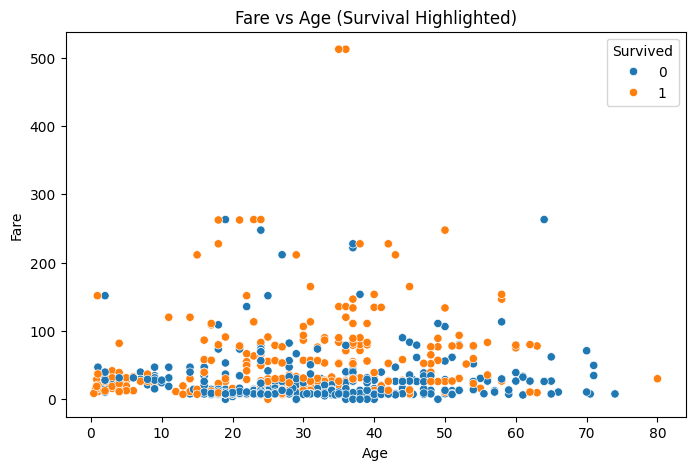

In [9]:
# Scatterplot: Fare vs Age by Survived
plt.figure(figsize=(8,5))
sns.scatterplot(x="Age", y="Fare", hue="Survived", data=df)
plt.title("Fare vs Age (Survival Highlighted)")
plt.show()


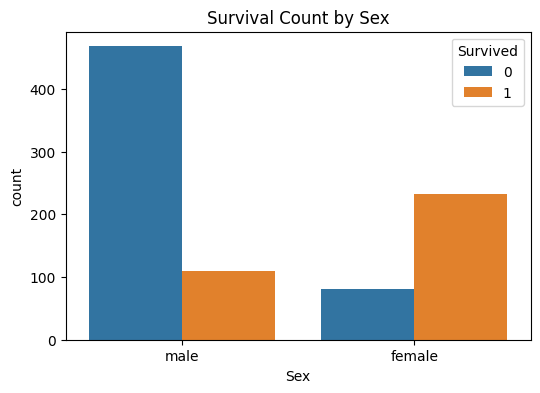

In [10]:
# Countplot: Survival by Sex
plt.figure(figsize=(6,4))
sns.countplot(x="Sex", hue="Survived", data=df)
plt.title("Survival Count by Sex")
plt.show()

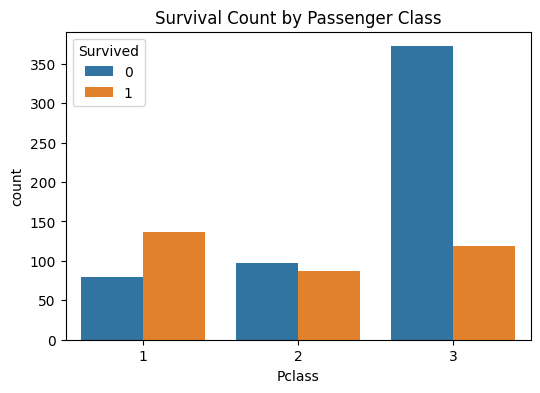

In [11]:

# Countplot: Survival by Pclass
plt.figure(figsize=(6,4))
sns.countplot(x="Pclass", hue="Survived", data=df)
plt.title("Survival Count by Passenger Class")
plt.show()


### e. heat map

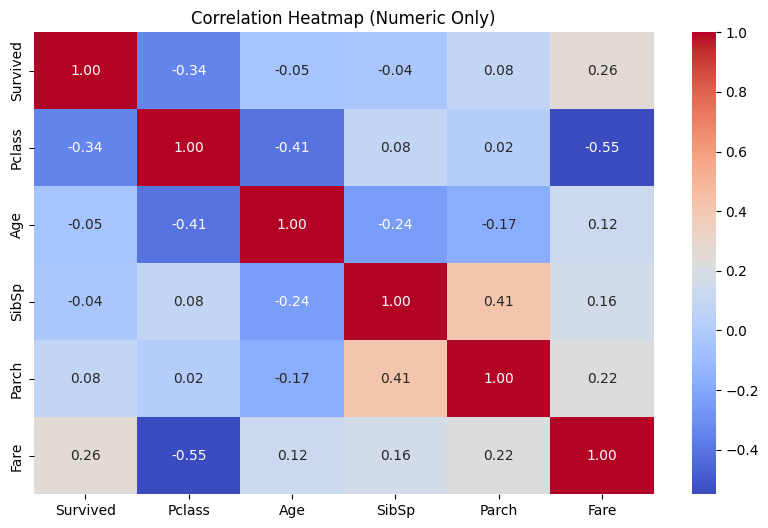

In [14]:

# Select only the numeric columns for correlation
numeric_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
corr = df[numeric_cols].corr()

# Draw the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Numeric Only)')
plt.show()